In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
df.shape

(693071, 57)

In [5]:
df=df.drop(['id'],axis=1)

In [6]:
df=df.drop(['timestamp','datetime','windGustTime','temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime',
           'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
            'sunriseTime','sunsetTime','precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax',
            'temperatureMaxTime','apparentTemperature','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax'
           ,'apparentTemperatureMaxTime','long_summary','icon','product_id','timezone','visibility.1','destination'],axis=1)

In [7]:
df.isnull().sum()

hour                     0
day                      0
month                    0
source                   0
cab_type                 0
name                     0
price                55095
distance                 0
surge_multiplier         0
latitude                 0
longitude                0
temperature              0
short_summary            0
precipIntensity          0
precipProbability        0
humidity                 0
windSpeed                0
windGust                 0
visibility               0
dewPoint                 0
pressure                 0
windBearing              0
cloudCover               0
uvIndex                  0
ozone                    0
moonPhase                0
dtype: int64

In [8]:
df=df[df['price'].isnull()==False]

In [9]:
df.isnull().sum()

hour                 0
day                  0
month                0
source               0
cab_type             0
name                 0
price                0
distance             0
surge_multiplier     0
latitude             0
longitude            0
temperature          0
short_summary        0
precipIntensity      0
precipProbability    0
humidity             0
windSpeed            0
windGust             0
visibility           0
dewPoint             0
pressure             0
windBearing          0
cloudCover           0
uvIndex              0
ozone                0
moonPhase            0
dtype: int64

In [10]:
num_col=df.select_dtypes(include='number')

In [11]:
cat_col=df.select_dtypes(include='object')

In [12]:
cat_col.head()

,source,cab_type,name,short_summary
0,Haymarket Square,Lyft,Shared,Mostly Cloudy
1,Haymarket Square,Lyft,Lux,Rain
2,Haymarket Square,Lyft,Lyft,Clear
3,Haymarket Square,Lyft,Lux Black XL,Clear
4,Haymarket Square,Lyft,Lyft XL,Partly Cloudy


In [13]:
cat_col1=cat_col.copy()

In [14]:
cat_col['price']=df['price']

In [15]:
data2=df[['price','distance','latitude','temperature','windGust','visibility','dewPoint']]

In [16]:
for column in data2:
    df[column]=data2[column]

In [17]:
num_col=df.select_dtypes(include='number')

In [18]:
cat_col

,source,cab_type,name,short_summary,price
0,Haymarket Square,Lyft,Shared,Mostly Cloudy,5.0
1,Haymarket Square,Lyft,Lux,Rain,11.0
2,Haymarket Square,Lyft,Lyft,Clear,7.0
3,Haymarket Square,Lyft,Lux Black XL,Clear,26.0
4,Haymarket Square,Lyft,Lyft XL,Partly Cloudy,9.0
...,...,...,...,...,...
693065,West End,Uber,WAV,Partly Cloudy,9.5
693066,West End,Uber,UberXL,Partly Cloudy,13.0
693067,West End,Uber,UberX,Partly Cloudy,9.5
693069,West End,Uber,Black SUV,Partly Cloudy,27.0


In [19]:
df.source.value_counts()

Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: source, dtype: int64

In [20]:
df.cab_type.value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [21]:
df.name.value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [22]:
df.short_summary.value_counts()

 Overcast             201429
 Mostly Cloudy        134603
 Partly Cloudy        117226
 Clear                 80256
 Light Rain            50488
 Rain                  21781
 Possible Drizzle      17176
 Foggy                  8292
 Drizzle                6725
Name: short_summary, dtype: int64

In [23]:
df=pd.get_dummies(df,columns=['cab_type'],drop_first=True)

In [24]:
df=pd.get_dummies(df,columns=['short_summary'],drop_first=True)

In [25]:
df=pd.get_dummies(df,columns=['name'],drop_first=True)

In [26]:
df=pd.get_dummies(df,columns=['source'],drop_first=True)

In [27]:
df.head()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,...,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,0.0000,...,0,0,0,1,0,0,0,0,0,0
1,2,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,0.1299,...,0,0,0,1,0,0,0,0,0,0
2,1,28,11,7.0,0.44,1.0,42.2148,-71.033,38.33,0.0000,...,0,0,0,1,0,0,0,0,0,0
3,4,30,11,26.0,0.44,1.0,42.2148,-71.033,34.38,0.0000,...,0,0,0,1,0,0,0,0,0,0
4,3,29,11,9.0,0.44,1.0,42.2148,-71.033,37.44,0.0000,...,0,0,0,1,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
filterwarnings('ignore')

In [32]:
data=df.copy()

In [ ]:
#Perform supervised learning to predict price for the location

In [33]:
X=data.drop(['price'],axis=1)
Y=data['price']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=48)

In [34]:
supervised=LinearRegression()

In [35]:
supervised.fit(x_train,y_train)

LinearRegression()

In [36]:
pred=supervised.predict(x_test)

In [61]:
pred

array([ 8.07942931, 26.06044015,  8.00046556, ..., 12.36991148,
       12.35164516, 16.37695105])

In [37]:
r2_score(y_test,pred)

0.9275623952295384

In [ ]:
 #Perform unsupervised clustering to predict high booking areas

In [38]:
X_cluster = df[['latitude', 'longitude']]

In [39]:
X_cluster 

,latitude,longitude
0,42.2148,-71.0330
1,42.2148,-71.0330
2,42.2148,-71.0330
3,42.2148,-71.0330
4,42.2148,-71.0330
...,...,...
693065,42.3519,-71.0643
693066,42.3519,-71.0643
693067,42.3519,-71.0643
693069,42.3519,-71.0643


In [40]:
# Instantiate the KMeans algorithm
kmeans = KMeans(n_clusters=5, random_state=42)

In [41]:
# Fit the data to the algorithm
kmeans.fit(X_cluster)

KMeans(n_clusters=5, random_state=42)

In [42]:
# Predict the clusters
clusters = kmeans.predict(X_cluster)

In [43]:
# Add the predicted clusters to the dataset
df['cluster'] = clusters

In [ ]:
 #Perform supervised learning to predict price for the location

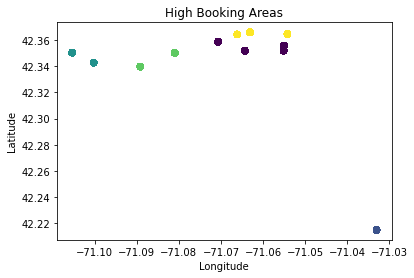

In [44]:
# Create a scatter plot of the high booking areas
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'])
plt.title('High Booking Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()